# HW 2 - Binary Classifiers

Kim Thach
*ECGR 5090 - C01*
**800793249**

https://github.com/thachkse/Intro-to-ML/tree/main/HW_2


Table of Contents

1. Logistic Regression
2. Naive Bayes Binary Classifier
3. K-fold Cross Validation
3. K-fold Cross Validiation Part 2


# Problem 1: Logistic Regresion

Original Problem Statement:

* Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. 

* Please use 80% and 20% split between training and evaluation (test). 

* Make sure to perform proper scaling and standardization before your training. 

* Report your results, including accuracy, precision, and recall. Also, plot the confusion matrix representing your binary classifier. 


## Import Data

This section below shows the general libraries needed throughout this notebook / script. Ensure that the diabetes.csv is located in the working directory when running the code. The workbook / csv file contains 9 columns - totaling 8 features of the dataset and with a column (9th) containing an binary outcome (diabetic / non-diabetic patient ) .

In [1]:
# Initialize some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in Dataset
DF = pd.DataFrame(pd.read_csv("diabetes.csv"))
print(DF.head())

# What's the size of the dataset?

print('This dataset has ' + str(DF.shape[0]) +' rows')
print('This dataset has ' + str(DF.shape[1]) +' columns')


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
This dataset has 768 rows
This dataset has 9 columns


## Data Organization and Standardization

In [2]:
# Define Input and Outputs for the dataset
Xin = DF.iloc[:,[0,1,2,3,4,5,6,7]].values
Yout = DF.Outcome.values

#print(Xin[0:5,:])


In [3]:
# Split data set
from sklearn.model_selection import train_test_split

np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(Xin, Yout, train_size = 0.8, test_size = 0.2, random_state = 42)

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

scaler_std = StandardScaler() 
train_std = scaler_std.fit_transform(x_train) 
test_std = scaler_std.transform(x_test) 

#scaler_mm = MinMaxScaler()
#train_mm = scaler_mm.fit_transform(x_train) 
#test_mm = scaler_mm.transform(x_test) 



In [5]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0) 
classifier.fit(train_std, y_train)


LogisticRegression(random_state=0)

In [6]:
Y_pred = classifier.predict(test_std)

Y_pred[0:9]

#(Y_pred == y_test).mean()

array([0, 0, 0, 0, 0, 0, 0, 1, 1])

In [7]:
# Confusion matrix to get accuracy
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, Y_pred)
cnf_matrix


array([[79, 20],
       [18, 37]])

## Results

The different results are provided below. The Accuracy , Precision, Recall rates, a confusion matrix, and a binary plot of the logistic regression results.

In [8]:

# Evaluate the model : accuracy, precision & recall

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,Y_pred))
print("Precision:",metrics.precision_score(y_test,Y_pred))
print("Recall:",metrics.recall_score(y_test, Y_pred))

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727


Text(0.5, 257.44, 'Predicted label')

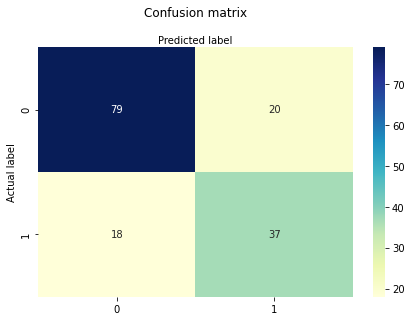

In [9]:
# Visualization of the model

import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


(154, 2)
(6, 5)
(6, 5)


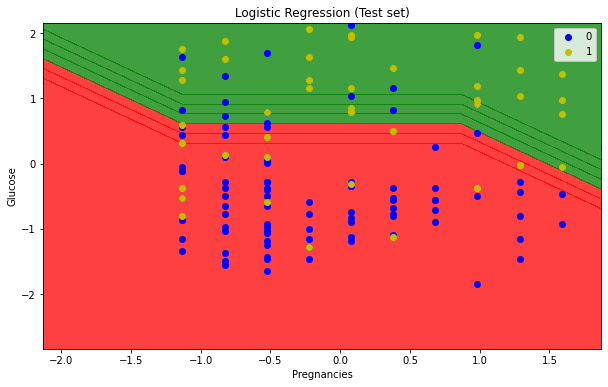

In [10]:
import warnings 
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LogisticRegression

X, y = test_std[:,0:2], y_test
classifierx = LogisticRegression(random_state=0) 
classifierx.fit(train_std[:,0:2], y_train)

X_set = test_std[:,0:2] 
Y_set = y_test
print(X_set.shape)


X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() -1, stop = X_set[:,0].max()),np.arange(start = X_set[:,1].min() -1, stop = X_set[:,1].max()))
print(X1.shape)
print(X2.shape)

xgrid = np.array([X1.ravel(),X2.ravel()]).T
#print(xgrid)
#XT = classifier.predict(test_std).reshape(xgrid.shape)



XT = classifierx.predict(xgrid).reshape(X1.shape)

    
plt.figure(figsize = (10, 6)) 
plt.contourf(X1, X2, XT, alpha = 0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color = 'b', label = '0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color = 'y', label = '1')
plt.title('Logistic Regression (Test set)')
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.legend()
plt.show()



#for i, j in enumerate(np.unique(Y_set)):
    #plt.scatter(X_set[Y_set == j, 0], X_set[Y_set ==j, 1], c = ListedColormap(('yellow','blue'))(i),label = j)
    #plt.title('Logistic Regression (Test set)')
    #plt.xlabel('Pregnancies')
    #plt.ylabel('Glucose')
    #plt.legend()
    #plt.show()


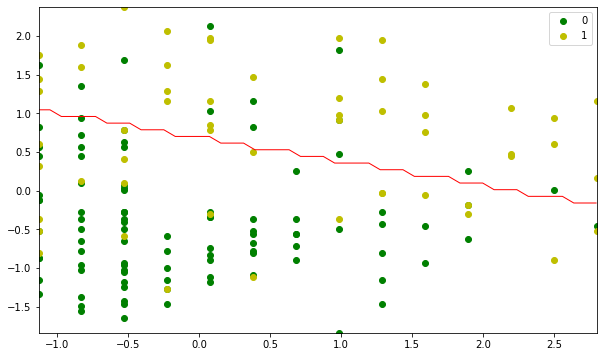

In [11]:
from sklearn.linear_model import LogisticRegression

X, y = test_std[:,0:2], y_test
classifierx = LogisticRegression(random_state=0) 
classifierx.fit(train_std[:,0:2], y_train)


#print(test_std.shape)
#print(X.shape)
#print(y.shape)

plt.figure(figsize = (10, 6))


plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color = 'g', label = '0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color = 'y', label = '1')
plt.legend()

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.array([xx1.ravel(), xx2.ravel()]).T
#print(grid.shape)

probs = classifierx.predict(grid).reshape(xx1.shape)
#print(probs.shape)
#print(xx1.shape)
#plt.plot(xx1, xx2, [0.5], linewidths=1, colors='red');
plt.contour(xx1, xx2, probs,[0.5], linewidths=1, colors='red')


## Observation - Problem 1

The logistic regression shows a very high True negative (dark blue quadrant), which is evident on the confusion matrix above. Whereas, the true positives fall short significantly. This means the model is able to accurately determine who may be negative for diabetes and it's repeatability in this case is quite good. The two plots below the confusion matrix represent 2 of the features in the dataset as scatter plots (x-axis: pregnancies, y-axis: Glucose). I wasn't quite sure how to show more than 2 features on a single plot for the classifier.

I that case, this is somewhat representative in one portion of space for the model. The model or the threshold line determined from the model shows a fairly decent separation between the 2 classes. While reviewing the plots it seems the model works pretty well. 

# Problem 2: Gaussian Naive Bayes

Using the diabetes dataset, build a **Naïve Bays binary classifier** for positive diabetes. 

Please use 80% and 20% split between training and evaluation (test). 

* Make sure to perform proper scaling and standardization before your training. 

* Report your results, including accuracy, precision, and recall. 

* Also, plot the confusion matrix representing your binary classifier. 

* Compare and analyze your results against problem 1.



In [12]:
from sklearn.naive_bayes import GaussianNB

classifierG = GaussianNB()
classifierG.fit(train_std,y_train)


GaussianNB()

In [13]:
Y2_pred = classifierG.predict(test_std)

In [14]:
from sklearn import metrics
cm = confusion_matrix(y_test, Y2_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(y_test,Y2_pred))
print("Precision:",metrics.precision_score(y_test,Y2_pred))
print("Recall:",metrics.recall_score(y_test, Y2_pred))

# Has a higher accuracy, but why??? There's soo many features..

[[79 20]
 [16 39]]
Accuracy: 0.7662337662337663
Precision: 0.6610169491525424
Recall: 0.7090909090909091


Text(0.5, 257.44, 'Predicted label')

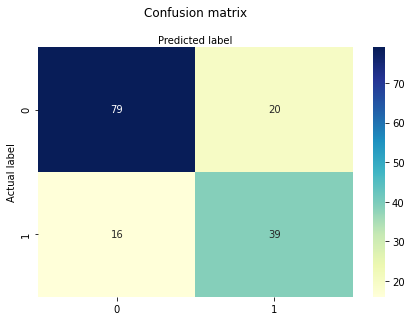

In [15]:
import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



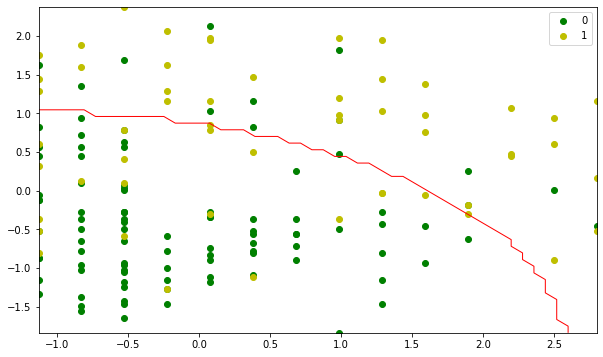

In [16]:
from sklearn.naive_bayes import GaussianNB
X, y = test_std[:,0:2], y_test
classifierG2 = GaussianNB()
classifierG2.fit(train_std[:,0:2],y_train)

#print(test_std.shape)
#print(X.shape)
#print(y.shape)

plt.figure(figsize = (10, 6))


plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color = 'g', label = '0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color = 'y', label = '1')
plt.legend()

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1_2, xx2_2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid_2 = np.array([xx1.ravel(), xx2.ravel()]).T
#print(grid.shape)

probs_2 = classifierG2.predict(grid).reshape(xx1.shape)
#print(probs.shape)
#print(xx1.shape)
#plt.plot(xx1, xx2, [0.5], linewidths=1, colors='red');
plt.contour(xx1_2, xx2_2, probs_2,[0.5], linewidths=1, colors='red')

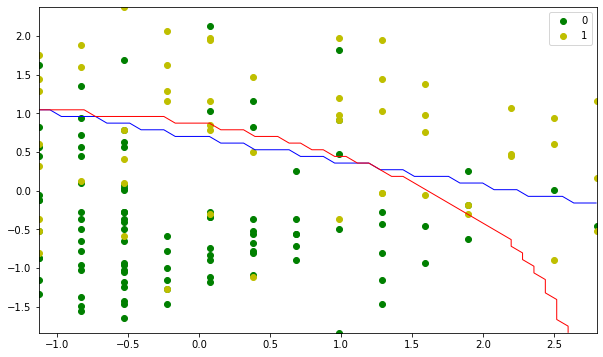

In [17]:
plt.figure(figsize = (10, 6))


plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color = 'g', label = '0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color = 'y', label = '1')
plt.legend()

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
plt.contour(xx1, xx2, probs,[0.5], linewidths=1, colors='blue')
plt.contour(xx1_2, xx2_2, probs_2,[0.5], linewidths=1, colors='red')

## Observation - Problem 2

The Naive bayes model shows a very similar confusion matrix to the one created using the logistic regression classifier. The accuracy and the recall for the model is slightly higher, than that of the logistic regression. It is uncertain whether or not that plays a significant role / shows any significant improvement between the models. 

Using the same features as before for the scatter points, the 2 plots above shows the threshold generated with the Naive bayes classification approach and the plot directly below shows the both generated thresholds / classifiers on the same plot.  The blue line - is the threshold generated by the logisitic regression classifier, and the red plotted line is the one recently generated using the Gaussian Naive Bayes classifier. It seems through visual observation that the Naive Bayes classifier may be slightly better technique for this specific dataset to identify a diabetic / non-diabetic patient.

# Problem 3 - Logistic Regression + K-Folds

Repeat problem 1, 

* Use K-fold cross-validation for your training and validation. 

* Perform the training two times for K=5 and K=10. 

* Analyze and compare your results against problem 1.

In [18]:
# Define Input and Outputs for the dataset
#Xin = DF.iloc[:,[0,1,2,3,4,5,6,7]].values
#Yout = DF.Outcome.values

from sklearn.model_selection import KFold
Xk = Xin
yk = Yout
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(Xk):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_traink, X_testk = Xk[train_index], Xk[test_index]
    y_traink, y_testk = yk[train_index], yk[test_index]
print(X_traink)

KFold(n_splits=5, random_state=None, shuffle=False)
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  7.    168.     88.    ...  38.2     0.787  40.   ]
 [  6.    105.     80.    ...  32.5     0.878  26.   ]
 [ 11.    138.     74.    ...  36.1     0.557  50.   ]]


In [19]:
# Standardize training sets
scaler_std = StandardScaler() 
train_stdk = scaler_std.fit_transform(X_traink) 
test_stdk = scaler_std.transform(X_testk) 


In [20]:
Y_predk = classifier.predict(test_stdk)
Y_predk[0:9]

array([0, 0, 0, 0, 0, 0, 0, 1, 0])

In [21]:
# Confusion matrix to get accuracy
from sklearn.metrics import confusion_matrix
cnf_matrixk = confusion_matrix(y_testk, Y_predk)
cnf_matrixk

array([[89, 10],
       [26, 28]])

In [22]:
# Evaluate the model : accuracy, precision & recall

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_testk,Y_predk))
print("Precision:",metrics.precision_score(y_testk,Y_predk))
print("Recall:",metrics.recall_score(y_testk, Y_predk))

Accuracy: 0.7647058823529411
Precision: 0.7368421052631579
Recall: 0.5185185185185185


Text(0.5, 257.44, 'Predicted label')

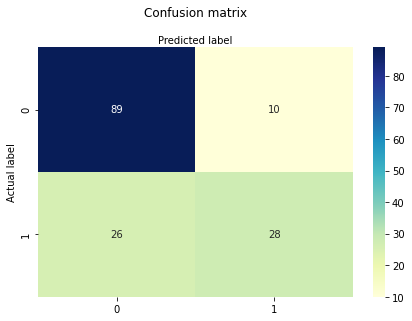

In [23]:
import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixk), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

KFold(n_splits=10, random_state=None, shuffle=False)
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  1.    144.     82.    ...  46.1     0.335  46.   ]
 [  8.    107.     80.    ...  24.6     0.856  34.   ]
 [ 13.    158.    114.    ...  42.3     0.257  44.   ]]
[0 1 0 0 1 0 0 1 0]
[[43  3]
 [13 17]]
Accuracy: 0.7894736842105263
Precision: 0.85
Recall: 0.5666666666666667


Text(0.5, 257.44, 'Predicted label')

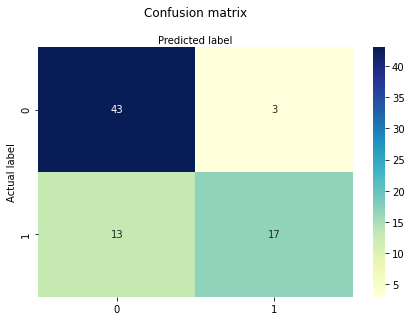

In [24]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)

print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(Xk):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_traink2, X_testk2 = Xk[train_index], Xk[test_index]
    y_traink2, y_testk2 = yk[train_index], yk[test_index]
print(X_traink2)

train_stdk2 = scaler_std.fit_transform(X_traink2) 
test_stdk2 = scaler_std.transform(X_testk2) 

Y_predk2 = classifier.predict(test_stdk2)
print(Y_predk2[0:9])

cnf_matrixk2 = confusion_matrix(y_testk2, Y_predk2)
print(cnf_matrixk2)

print("Accuracy:",metrics.accuracy_score(y_testk2,Y_predk2))
print("Precision:",metrics.precision_score(y_testk2,Y_predk2))
print("Recall:",metrics.recall_score(y_testk2, Y_predk2))


class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixk2), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

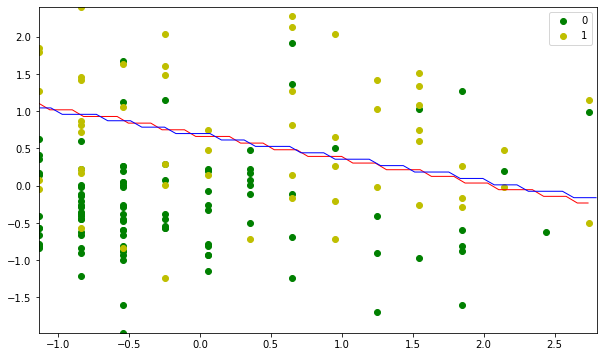

In [25]:
from sklearn.linear_model import LogisticRegression

X, y = test_stdk[:,0:2], y_testk
classifierx = LogisticRegression(random_state=0) 
classifierx.fit(train_stdk[:,0:2], y_traink)


#print(test_std.shape)
#print(X.shape)
#print(y.shape)

plt.figure(figsize = (10, 6))


plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color = 'g', label = '0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color = 'y', label = '1')
plt.legend()

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1_k, xx2_k = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.array([xx1_k.ravel(), xx2_k.ravel()]).T
#print(grid.shape)

probs_k = classifierx.predict(grid).reshape(xx1.shape)
#print(probs.shape)
#print(xx1.shape)
#plt.plot(xx1, xx2, [0.5], linewidths=1, colors='red');
plt.contour(xx1_k, xx2_k, probs_k,[0.5], linewidths=1, colors='red')
plt.contour(xx1, xx2, probs,[0.5], linewidths=1, colors='blue')

## Observation - Problem 3

This problem will follow many of the same steps used in problem 1 , but instead of manually defining percentages to split the training and validation set, the K-folds method will be used to iteratively define new trainig and validation sets in order to generate a more generalized model for determining a diabetic / non-diabetic patient. 

The confusion matrix shows a very similar color variation to each qaudrant as like the others before. in this case the values in the qaudrants are significantly lower when using the k-folds approach with higher number of folds. With just 5 folds it seems like outcome of the confusion matrix is very similar to the standard approach of splitting training and validation sets. Whereas when the number of folds increase the True negative value decreases overall by about 50%.

The plot above shows the 2 different training and validation approaches for the test set. The blue line represents the k-fold = 5 threshold and the red line represents the threshold generated with just the standard training/splitting approach for the logistic regression classifier. There's very little difference between the 2 methods in this case. Does it matter which approach you use, it doesn't seem so at the moment.

# Problem 4 - Gaussian Naive Bayes + K-folds

Repeat problem 2, 

* K-fold cross-validation for your training and validation. 

* Does this make sense? Elaborate on your answer.



KFold(n_splits=5, random_state=None, shuffle=False)
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  7.    168.     88.    ...  38.2     0.787  40.   ]
 [  6.    105.     80.    ...  32.5     0.878  26.   ]
 [ 11.    138.     74.    ...  36.1     0.557  50.   ]]
[0 1 0 0 1 0 0 1 0]
[[84 15]
 [24 30]]
Accuracy: 0.7450980392156863
Precision: 0.6666666666666666
Recall: 0.5555555555555556


Text(0.5, 257.44, 'Predicted label')

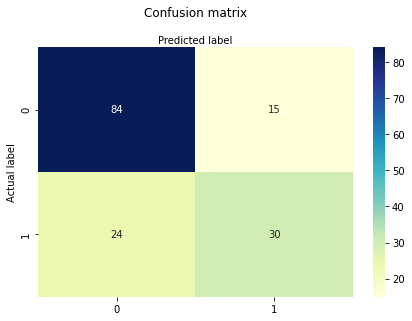

In [26]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(Xk):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_traink2, X_testk2 = Xk[train_index], Xk[test_index]
    y_traink2, y_testk2 = yk[train_index], yk[test_index]
print(X_traink2)

train_stdk2 = scaler_std.fit_transform(X_traink2) 
test_stdk2 = scaler_std.transform(X_testk2) 

classifierGx = GaussianNB()
classifierGx.fit(train_stdk2,y_traink2)
Y_predkG = classifierGx.predict(test_stdk2)
print(Y_predk2[0:9])

cnf_matrixk2G = confusion_matrix(y_testk2, Y_predkG)
print(cnf_matrixk2G)

print("Accuracy:",metrics.accuracy_score(y_testk2,Y_predkG))
print("Precision:",metrics.precision_score(y_testk2,Y_predkG))
print("Recall:",metrics.recall_score(y_testk2, Y_predkG))


class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixk2G), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


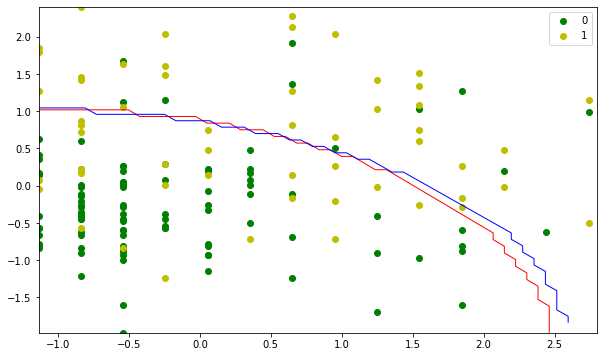

In [27]:
from sklearn.linear_model import LogisticRegression

X, y = test_stdk2[:,0:2], y_testk2

classifierGk = GaussianNB()
classifierGk.fit(train_stdk2[:,0:2],y_traink2)



#print(test_std.shape)
#print(X.shape)
#print(y.shape)

plt.figure(figsize = (10, 6))


plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color = 'g', label = '0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color = 'y', label = '1')
plt.legend()

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1_kg, xx2_kg = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.array([xx1_kg.ravel(), xx2_kg.ravel()]).T
#print(grid.shape)

probs_kg = classifierGk.predict(grid).reshape(xx1.shape)
#print(probs.shape)
#print(xx1.shape)
#plt.plot(xx1, xx2, [0.5], linewidths=1, colors='red');
plt.contour(xx1_kg, xx2_kg, probs_kg,[0.5], linewidths=1, colors='red')
plt.contour(xx1_2, xx2_2, probs_2,[0.5], linewidths=1, colors='blue')

## Observation - Problem 4

In this problem the problem follows problem 3 but instead of using a logistic regression classifier, this problem uses the Gaussian Naive Bayes classifier. In this problem, we will focus on just the outcome of trainig your model using k-folds = 5 as it seems before that increasing k-folds to 10 seemingly deteriorates the model even more. 

The confusion matrix shows that the true negative scores are quite high but the true positives are significantly low. The plot above shows the model generated using the k-folds training approach (red line) and the standard training approach (blue). Both models seem to behave very similar. The k-folds does seem to truly capture more of the negatives fairly well but the standard approach is slightly more generalized.



# Conclusion

Overall for this dataset it's important to identify those who are truly diabetic and also certainly rule out those who are not diabetic. All approaches seemed to provide very similar outcomes, but the slight differences in the models / small improvements may translate into the real world a lot better. The logistic regression model showed more of a linearly consistent seperation, this may be due to the limitations of the sigmoid function (partly, maybe because I might not be visualizing these models appropriately.) The gaussian naive bayes approach offered a much more flexible threshold / grouping for the model. I think the ideal model for this type of data could possible be the Gaussian Naive bayes model, as there are a large variability in features, that may seem continuous but the degree importance of each feature may vary.

The k-fold approach did not enhance the outcome of the model very much. It seemed to show very little changes, and might not be the most efficient training / validation approach for this particular dataset.



https://github.com/thachkse/Intro-to-ML/tree/main/HW_2